In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect= True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
#find columns in the table
inspector = inspect(engine)
print('measurement table')
measurement_columns = inspector.get_columns("measurement")
for column in measurement_columns:
    print(column['name'], column['type'])

print('\nstation table')
station_columns = inspector.get_columns("station")
for column in station_columns:
    print(column['name'], column['type'])

measurement table
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station table
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [16]:
# Find the most recent date in the data set.
mostrecent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(mostrecent_date)


('2017-08-23',)


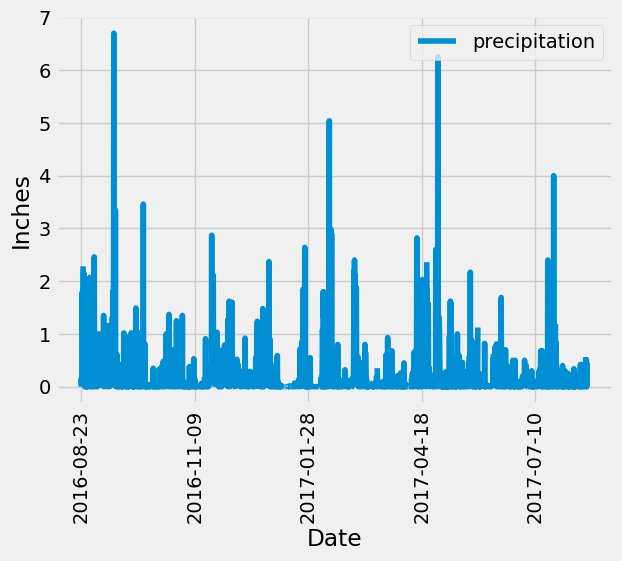

In [62]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
values = session.query(Measurement.date, Measurement.prcp)

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores
filtered_values = values.filter(Measurement.date > '2016-08-22').order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(filtered_values)


# Sort the dataframe by date
sorted_df = precipitation_df.set_index("date")
sorted_df = sorted_df.rename(columns={'prcp': 'precipitation'})
# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot()
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [42]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).count()
total_stations

9

In [53]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_st = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()
print(most_active_st)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [54]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
best_station = most_active_st[0][0]
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == best_station).all()

[(54.0, 71.66378066378067, 85.0)]

('2017-08-18', 79.0)


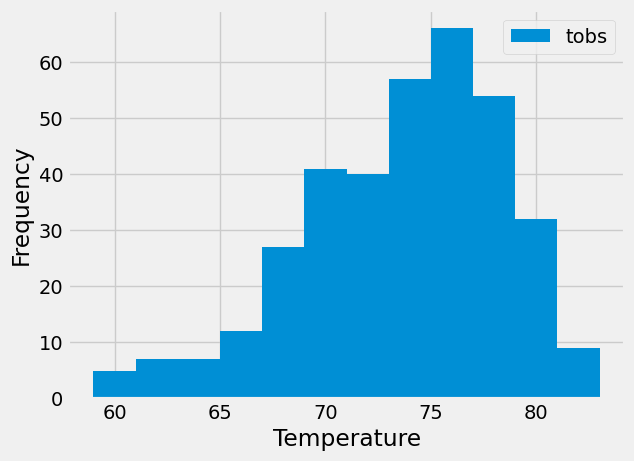

In [76]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_recent_date_station = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == best_station).\
    order_by(Measurement.date.desc()).first()
print(most_recent_date_station)

#most recent date station is '2017-08-18' for the best station: USC00519281
#creating a query to find dates before 2018-08-08
twelve_month = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == best_station).\
    filter(Measurement.date > '2016-08-17').all()

#for value in twelve_month:
    #print(value)
twelvemonth_df = pd.DataFrame(twelve_month)['tobs']

#twelvemonth_df

hist = twelvemonth_df.hist(bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()

# Close Session

In [74]:
# Close Session
session.close()